In [1]:
import sqlite3

# Create and connect to SQLite database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sample data
sample_data = [
    ('Product A', 10, 15.0),
    ('Product B', 5, 30.0),
    ('Product A', 7, 15.0),
    ('Product C', 12, 20.0),
    ('Product B', 4, 30.0),
    ('Product C', 3, 20.0)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()
conn.close()

print("sales_data.db created with sample data.")


sales_data.db created with sample data.


In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Reconnect to the database
conn = sqlite3.connect("sales_data.db")

# SQL query
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

# Execute and load into pandas DataFrame
df = pd.read_sql_query(query, conn)
conn.close()

# Show result
print("Sales Summary:")
print(df)


Sales Summary:
     product  total_qty  revenue
0  Product A         17    255.0
1  Product B          9    270.0
2  Product C         15    300.0


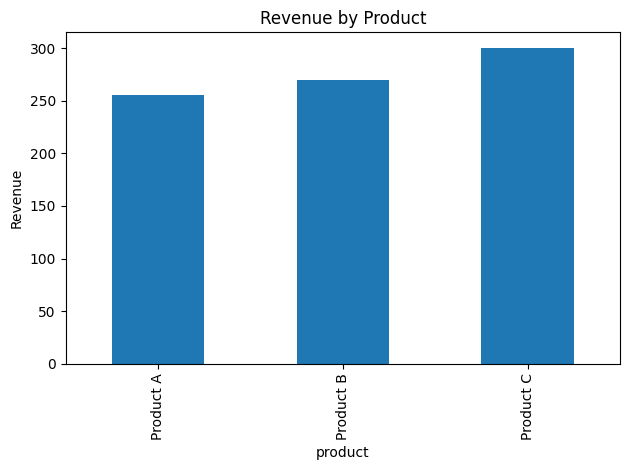

In [3]:
# Plot revenue per product
df.plot(kind='bar', x='product', y='revenue', title='Revenue by Product', legend=False)
plt.ylabel('Revenue')
plt.tight_layout()
plt.savefig("sales_chart.png")  # Save the chart
plt.show()
